## **Final Project: Information Extraction**
### Student Name : Darshika Verma

## **Instructions**

-	Include all group members name on the document.
-	All group members must submit a version of the document.
-	Pick a text source you would like to use for the assignments. You will use this text source for all assignments and the final report.
-	Options for the text source:
    - Webpages
    - Movie/tv show subtitles
    - Speeches
    - PDFs
    - And more
-	Text source must have at least 10,000 tokens. In order to process text efficiently, try not to go over 100,000 words.

## **Loading Libraries**

In [1]:
pip install textacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.5 MB/s eta 0:00:00


In [2]:
pip install afinn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 669.8 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53430 sha256=55584f77aae3f59b31285813f806e2e947f42ba67f87e99d029c32ec327be172
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built afinn


In [3]:
pip install snorkel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 3.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [4]:
import spacy
#%%
import subprocess
#%%
print(subprocess.getoutput("python -m spacy download en_core_web_sm"))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 31.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [5]:
import os
import re
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import spacy
import textacy
import nltk
nltk.download('punkt')
from afinn import Afinn
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
nlp = spacy.load('en_core_web_sm')
from typing import Optional
from snorkel.preprocess import preprocessor
from snorkel.types import DataPoint
from spacy.tokens import Token
from itertools import combinations
import math
from tqdm import tqdm
from spacy.matcher import Matcher
import networkx as nx
from matplotlib import pyplot as plt
from collections import deque
from networkx import MultiDiGraph
from snorkel.labeling import PandasLFApplier
from snorkel.labeling import LFAnalysis
from spacy import displacy
from spacy.pipeline import EntityRuler
from spacy.tokens import Span
from spacy import Language

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## **Import Data**

- Import the data into a notebook/file and display that it includes 10,000 tokens.

#### ***Data Source*** : https://fangj.github.io/friends/

#### I fetched and parsed the text content of multiple webpages containing subtitles from the TV show "Friends," accumulating the texts into a complete string and a list of paragraphs. I also handled failed webpage retrievals by printing an error message with the status code.

In [6]:
# List of URLs to scrape
urls = [
    'https://fangj.github.io/friends/season/0101.html',
    'https://fangj.github.io/friends/season/0102.html',
    'https://fangj.github.io/friends/season/0103.html',
    'https://fangj.github.io/friends/season/0104.html',
    'https://fangj.github.io/friends/season/0105.html',
    'https://fangj.github.io/friends/season/0106.html',
    'https://fangj.github.io/friends/season/0107.html',
    'https://fangj.github.io/friends/season/0108.html',
    'https://fangj.github.io/friends/season/0109.html',
    'https://fangj.github.io/friends/season/0110.html',
    'https://fangj.github.io/friends/season/0111.html',
    'https://fangj.github.io/friends/season/0112.html'
    ]

# Function to fetch and parse a webpage, and return its text content
def fetch_page_text(urls):
    complete_text = ""  # Initialize empty string to accumulate text
    textList = []  # Initialize empty list to store paragraph texts
    for url in urls:
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            text_content = soup.find_all('p')
            paragraphs = [paragraph.text for paragraph in text_content]
            textList.extend(paragraphs)
            complete_text += " ".join(paragraphs) + "\n\n"  # Add to complete_text with separation
        else:
            print(f"Failed to retrieve the webpage {url}. Status code: {response.status_code}")
    return complete_text, textList

# Call the function to fetch page texts
complete_text, textList = fetch_page_text(urls)

# Print the complete text (first 1000 characters)
print("First 1000 characters of complete_text:")
print(complete_text[:1000])

# Print the textList
print("\nContents of textList:")
print(textList)

First 1000 characters of complete_text:
Written by: Marta Kauffman & David Crane  Monica: There's nothing to tell! He's just some guy
I work with! Joey: C'mon, you're going out with the guy! There's
gotta be something wrong with him! Chandler: All right Joey, be
nice.  So does he have a hump? A hump and a hairpiece? Phoebe: Wait, does he eat chalk? (They all stare, bemused.) Phoebe: Just, 'cause, I don't want her to go through
what I went through with Carl- oh! Monica: Okay, everybody relax. This is not even a
date. It's just two people going out to dinner and- not having sex. Chandler: Sounds like a date to me. [Time Lapse] Chandler: Alright, so I'm back in high school, I'm
standing in the middle of the cafeteria, and I realize I am totally naked. All: Oh, yeah. Had that dream. Chandler: Then I look down, and I realize there's a
phone... there. Joey: Instead of...? Chandler: That's right. Joey: Never had that dream. Phoebe: No. Chandler: All of a sudden, the phone starts to ring.
Now 

In [7]:
# Tokenize the text
tokens = word_tokenize(complete_text)

# Display the number of tokens
print("Number of tokens in the text:", len(tokens))

Number of tokens in the text: 57794


#### The text contains **57,794** tokens.

#### Filtering out certain values, dropping rows with empty values, resulting in a cleaned DataFrame ready for further analysis (manual cleaning).

In [8]:
df = pd.DataFrame(textList, columns = ['Subtitle'])
df['Subtitle'] = df['Subtitle'].replace('Written by: Marta Kauffman & David Crane', np.nan)
df['Subtitle'] = df['Subtitle'].str.replace(r'\(.*?\)', '', regex=True)
values_to_remove = ['Opening Credits', 'Commercial Break', 'End', 'Closing Credits']
df = df[~df['Subtitle'].isin(values_to_remove)]
df = df.replace('', np.nan).dropna().reset_index(drop=True)

## **Fix Errors**

-	Examine the text for errors or problems by looking at the text.  
-	Clean the data with examples from class

#### I have written a function that simultaneously cleans text (cleanup function) and calculates impurity scores (impurity score function). This function computes two scores for each row in the dataset: **'Initial_Impurity_Score' before cleaning** and **'Post_Cleaning_Impurity_Score' after cleaning**. It's important to note that **after applying the cleanup function, some rows that were initially less clean have their impurity score reduced to 0.0**. I have also created a column below 'Cleaned_Subtitle' which eventually displays clean rows (implemented cleanup fucntion).

In [9]:
import re
import pandas as pd
import html

# Define the regular expression pattern
RE_SUSPICIOUS = re.compile(r'[&#<>{}\[\]\\]')

def impurity(lst):
    """Returns the share of suspicious characters in a text."""
    if len(lst) < 1:
        return 0
    _sum = 0
    for i in range(len(lst)):
        try:
            _sum += len(RE_SUSPICIOUS.findall(lst[i])) / len(lst[i]) #2/5
        except:
            pass
    return _sum

# Define the clean_up function
def clean_up(text):
    # Convert HTML escapes like &amp; to characters.
    text = html.unescape(text)
    # Remove HTML tags like <tab>
    text = re.sub(r'<[^<>]*>', ' ', text)
    # Remove markdown URLs like [Some text](https://....)
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)
    # Remove text or code in brackets like [0]
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)
    # Remove standalone sequences of specials
    text = re.sub(r'(?:^|\s)[&#<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text)
    # Remove standalone sequences of hyphens like --- or ==
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
    # Remove punctuation and parentheses
    text = re.sub(r'[,\.\(\)-]', '', text)
    # Remove sequences of white spaces
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text

# Apply the impurity function to the 'Subtitle' column before cleaning
df['Initial_Impurity_Score'] = df['Subtitle'].apply(lambda x: impurity([x]))
df.head(20)

,Subtitle,Initial_Impurity_Score
0,Monica: There's nothing to tell! He's just som...,0.000000
1,"Joey: C'mon, you're going out with the guy! Th...",0.000000
2,"Chandler: All right Joey, be\nnice. So does h...",0.000000
3,"Phoebe: Wait, does he eat chalk?",0.000000
4,"Phoebe: Just, 'cause, I don't want her to go t...",0.000000
5,"Monica: Okay, everybody relax. This is not eve...",0.000000
6,Chandler: Sounds like a date to me.,0.000000
7,[Time Lapse],0.166667
8,"Chandler: Alright, so I'm back in high school,...",0.000000
9,"All: Oh, yeah. Had that dream.",0.000000


In [10]:
# Apply the clean_up function to the 'Subtitle' column
df['Cleaned_Subtitle'] = df['Subtitle'].apply(clean_up)
# Apply the impurity function to the 'Cleaned_Subtitle' column after cleaning
df['Post_Cleaning_Impurity_Score'] = df['Cleaned_Subtitle'].apply(lambda x: impurity([x]))
df = df.replace('', np.nan).dropna().reset_index(drop=True)
# Display the DataFrame
df[['Cleaned_Subtitle','Post_Cleaning_Impurity_Score']].head(20)

,Cleaned_Subtitle,Post_Cleaning_Impurity_Score
0,Monica: There's nothing to tell! He's just som...,0.0
1,Joey: C'mon you're going out with the guy! The...,0.0
2,Chandler: All right Joey be nice So does he ha...,0.0
3,Phoebe: Wait does he eat chalk?,0.0
4,Phoebe: Just 'cause I don't want her to go thr...,0.0
5,Monica: Okay everybody relax This is not even ...,0.0
6,Chandler: Sounds like a date to me,0.0
7,Chandler: Alright so I'm back in high school I...,0.0
8,All: Oh yeah Had that dream,0.0
9,Chandler: Then I look down and I realize there...,0.0


In [11]:
columns_to_drop = ['Subtitle', 'Initial_Impurity_Score', 'Post_Cleaning_Impurity_Score']
df.drop(columns=columns_to_drop, inplace=True)
new_column_name = 'Subtitle'
df.rename(columns={'Cleaned_Subtitle': new_column_name}, inplace=True)
df_sentences = df
df_sentences.head(5) #Cleaned dataset

,Subtitle
0,Monica: There's nothing to tell! He's just som...
1,Joey: C'mon you're going out with the guy! The...
2,Chandler: All right Joey be nice So does he ha...
3,Phoebe: Wait does he eat chalk?
4,Phoebe: Just 'cause I don't want her to go thr...


## **Processing Text Summary**

-	Write a paragraph explaining the process of cleaning data for a your NLP pipeline. You should explain the errors you found in the dataset and how you fixed them. Why did you think these things were important to fix for this project?

### In my project, I encountered several types of errors in the dataset, such as irrelevant text segments like credits and breaks, unnecessary square brackets, as well as punctuation and formatting inconsistencies. These issues were problematic because they could introduce noise and distort the natural language patterns I aim to analyze. To address these concerns, I implemented a cleanup function that systematically removed irrelevant segments, normalized punctuation, and standardized formatting across the dataset. This cleanup process was crucial to ensure that NLP models receive clean and consistent input, thereby improving it's ability to accurately analyze and extract meaningful insights from the text. After applying the cleanup function, I observed significant reductions in the impurity scores of some rows (which were initially uncleaned), indicating that the text became cleaner and more suitable for further analysis. Additionally, I created a new column, 'Cleaned_Subtitle,' to store the cleaned text, facilitating easy access to the processed data for subsequent pipeline stages like extracting the named entities, attributes and getting a knowledge graph. **Removing errors and inconsistencies improves the quality of text analysis, enhances model performance, and facilitates better insights and interpretations from the data**. This approach ultimately supports the overall goals of the project by ensuring that the processed text is as clear and meaningful as possible.

## **NER**
- Use spacy to extract named entities.
- Create a summary of your named entities.
- Apply Snorkel to your data to show any relationship between names.
- What kinds of relationships did you explore? Did you find any?

#### I used SpaCy to process and extract named entities from a dataset of subtitles. I concatenated all subtitles into a single string 'subtitle' for efficient processing and identified the named entities. I filtered and extracted specific types of entities (e.g., PERSON, ORG, GPE etc.) from each subtitle, storing them in a DataFrame. Finally, I counted and sorted the entities by frequency to create a summary and displayed both the summary and the detailed DataFrame. Below output shows that there are diverse Named Entities in the dataset (subtitles) amongst whish 'PERSON' named entity has the most occurence, followed by 'GPE'.

In [12]:
# concatenate all subtitles into a single string
subtitle = ' '.join(df_sentences['Subtitle'])
subtitle[0:100000]

'Monica: There\'s nothing to tell! He\'s just some guy I work with! Joey: C\'mon you\'re going out with the guy! There\'s gotta be something wrong with him! Chandler: All right Joey be nice So does he have a hump? A hump and a hairpiece? Phoebe: Wait does he eat chalk? Phoebe: Just \'cause I don\'t want her to go through what I went through with Carl oh! Monica: Okay everybody relax This is not even a date It\'s just two people going out to dinner and not having sex Chandler: Sounds like a date to me Chandler: Alright so I\'m back in high school I\'m standing in the middle of the cafeteria and I realize I am totally naked All: Oh yeah Had that dream Chandler: Then I look down and I realize there\'s a phone there Joey: Instead of? Chandler: That\'s right Joey: Never had that dream Phoebe: No Chandler: All of a sudden the phone starts to ring Now I don\'t know what to do everybody starts looking at me Monica: And they weren\'t looking at you before?! Chandler: Finally I figure I\'d bette

In [13]:
# process the concatenated subtitles with SpaCy
processed_text = nlp(subtitle)
text_ents = []

# extract all named entities
for ent in processed_text.ents:
    text_ents.append([ent.text, ent.label_])

text_ents_df = pd.DataFrame(text_ents, columns=['Entity', 'Label'])

# extract specific types of named entities from individual subtitles
entities = []
for i in range(len(df_sentences)):
    tagged_sent = nlp(df_sentences.loc[i, 'Subtitle'])
    for ent in tagged_sent.ents:
        if ent.label_ in ['PERSON', 'ORG', 'GPE', 'EVENT', 'LOC', 'LAW']:
            entities.append([ent.text, ent.label_])

df_entities = pd.DataFrame(entities, columns=['Entity', 'Entity_Tag'])

# count and sort the frequency of each entity
entity_counts = df_entities['Entity'].astype('str').value_counts(ascending=False)

# display the summary of named entities
print("Summary of Named Entities:")
print(entity_counts)

# display the detailed DataFrame
print("\nDetailed Entity DataFrame:")
print(df_entities.head())


Summary of Named Entities:
Entity
Ross           607
Monica         503
Chandler       493
Joey           378
Paolo           50
              ... 
George           1
Dora             1
Clinton          1
White House      1
Ohhhh            1
Name: count, Length: 393, dtype: int64

Detailed Entity DataFrame:
     Entity Entity_Tag
0    Monica     PERSON
1      Joey     PERSON
2  Chandler     PERSON
3      Joey     PERSON
4      Carl     PERSON


In [14]:
processed_text = nlp(subtitle)
text_ents = []
for ent in processed_text.ents:
  text_ents.append([ent, ent.label_])

text_ents_df = pd.DataFrame(text_ents, columns=['Entity', 'Label'])
print(text_ents_df['Label'].value_counts().sort_values(ascending=True))

Label
QUANTITY          1
PERCENT           1
LANGUAGE          2
EVENT             7
LOC              11
MONEY            12
FAC              16
WORK_OF_ART      17
NORP             23
PRODUCT          25
ORDINAL          51
TIME             75
DATE             89
ORG             100
CARDINAL        129
GPE             135
PERSON         2850
Name: count, dtype: int64


#### Snorkel is a tool that helps create labeled data for training machine learning models without requiring a lot of manual work. I've written code to process pairs of subtitles where each pair typically contains dialogues between two people. First, I split each subtitle into segments based on who's speaking (Person1 and Person2). Then, I tokenize these segments into smaller units like words. For each segment, I locate where Person1 and Person2 are mentioned and record their positions. Additionally, I extract the words between Person1 and Person2, as well as the words that follow each person's mention (extracting rows with 'Ross' as Person1 or Person2). If any errors occur during this process, I handle them by setting the affected values to empty lists. Finally, I remove any rows that contain missing values to ensure the data is clean and complete.

In [15]:
# Create an empty DataFrame to store pairs
paired_df = pd.DataFrame(columns=['Sentence', 'Person1', 'Person2'])

pairs = []

# Extracting and pairing subtitles
subtitles = df_sentences['Subtitle'].tolist()

for i in range(0, len(subtitles) - 1, 2):
    try:
        person1, text1 = subtitles[i].split(":", 1)
        person2, text2 = subtitles[i + 1].split(":", 1)
        pairs.append({
            'Sentence': subtitles[i] + " " + subtitles[i + 1],
            'Person1': person1.strip(),
            'Person2': person2.strip()
        })
    except ValueError:
        # Skip the iteration if splitting fails (i.e., not enough values to unpack)
        continue

# Handle cases where there is an odd number of subtitles
if len(subtitles) % 2 != 0:
    try:
        person1, text1 = subtitles[-1].split(":", 1)
        pairs.append({
            'Sentence': subtitles[-1],
            'Person1': person1.strip(),
            'Person2': ''
        })
    except ValueError:
        # Handle the last subtitle if it does not contain a colon
        pairs.append({
            'Sentence': subtitles[-1],
            'Person1': subtitles[-1].strip(),
            'Person2': ''
        })

# Convert list of pairs to DataFrame
paired_df = pd.DataFrame(pairs)

In [16]:
ent_sentences = paired_df[(paired_df['Person1'] == "Ross")|(paired_df['Person2'] == "Ross")]
ent_sentences.head()

,Sentence,Person1,Person2
8,Chandler: Finally I figure I'd better answer i...,Chandler,Ross
10,Ross: I just feel like someone reached down my...,Ross,Chandler
12,Monica: Let me get you some coffee Ross: Thanks,Monica,Ross
13,Phoebe: Ooh! Oh! She starts to pluck at the ai...,Phoebe,Ross
14,Phoebe: Fine! Be murky! Ross: I'll be fine alr...,Phoebe,Ross


In [17]:
# Convert 'Sentence' column to string type and tokenize the sentences
ent_sentences['Sentence'] = ent_sentences['Sentence'].astype(str)
ent_sentences['tokens'] = ent_sentences['Sentence'].apply(word_tokenize)
ent_sentences.reset_index(inplace=True, drop=True)

# Initialize empty columns
ent_sentences['person1_word_idx'] = pd.Series(dtype='object')
ent_sentences['person2_word_idx'] = pd.Series(dtype='object')
ent_sentences['between_tokens'] = pd.Series(dtype='object')
ent_sentences['person1_right_tokens'] = pd.Series(dtype='object')
ent_sentences['person2_right_tokens'] = pd.Series(dtype='object')

# Process each sentence
for i in range(len(ent_sentences)):
    try:
        # Find indices of person1 and person2 in the sentence
        person1idx = re.search(re.escape(ent_sentences.loc[i, 'Person1']), ent_sentences.loc[i, 'Sentence']).span()
        person2idx = re.search(re.escape(ent_sentences.loc[i, 'Person2']), ent_sentences.loc[i, 'Sentence']).span()

        # Extract tokens between person1 and person2
        ent_sentences.at[i, 'between_tokens'] = word_tokenize(ent_sentences.loc[i, 'Sentence'][person1idx[1]:person2idx[0]])

        # Extract tokens to the right of person1
        ent_sentences.at[i, 'person1_right_tokens'] = word_tokenize(ent_sentences.loc[i, 'Sentence'][person1idx[1]:])

        # Extract tokens to the right of person2
        ent_sentences.at[i, 'person2_right_tokens'] = word_tokenize(ent_sentences.loc[i, 'Sentence'][person2idx[1]:])

        # Store indices as strings
        ent_sentences.at[i, 'person1_word_idx'] = str(person1idx)
        ent_sentences.at[i, 'person2_word_idx'] = str(person2idx)
    except Exception as e:
        # If any error occurs, set the values to empty lists
        ent_sentences.at[i, 'between_tokens'] = []
        ent_sentences.at[i, 'person1_right_tokens'] = []
        ent_sentences.at[i, 'person2_right_tokens'] = []
        print(f"Error processing row {i}: {e}")

<ipython-input-17-e1e0a7b15933>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ent_sentences['Sentence'] = ent_sentences['Sentence'].astype(str)
<ipython-input-17-e1e0a7b15933>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ent_sentences['tokens'] = ent_sentences['Sentence'].apply(word_tokenize)
<ipython-input-17-e1e0a7b15933>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [18]:
ent_sentences.dropna(inplace=True)
ent_sentences.head()

<ipython-input-18-6a85ec6b1932>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ent_sentences.dropna(inplace=True)


,Sentence,Person1,Person2,tokens,person1_word_idx,person2_word_idx,between_tokens,person1_right_tokens,person2_right_tokens
0,Chandler: Finally I figure I'd better answer i...,Chandler,Ross,"[Chandler, :, Finally, I, figure, I, 'd, bette...","(0, 8)","(132, 136)","[:, Finally, I, figure, I, 'd, better, answer,...","[:, Finally, I, figure, I, 'd, better, answer,...","[:, Hi]"
1,Ross: I just feel like someone reached down my...,Ross,Chandler,"[Ross, :, I, just, feel, like, someone, reache...","(0, 4)","(134, 142)","[:, I, just, feel, like, someone, reached, dow...","[:, I, just, feel, like, someone, reached, dow...","[:, Cookie, ?]"
2,Monica: Let me get you some coffee Ross: Thanks,Monica,Ross,"[Monica, :, Let, me, get, you, some, coffee, R...","(0, 6)","(35, 39)","[:, Let, me, get, you, some, coffee]","[:, Let, me, get, you, some, coffee, Ross, :, ...","[:, Thanks]"
3,Phoebe: Ooh! Oh! She starts to pluck at the ai...,Phoebe,Ross,"[Phoebe, :, Ooh, !, Oh, !, She, starts, to, pl...","(0, 6)","(65, 69)","[:, Ooh, !, Oh, !, She, starts, to, pluck, at,...","[:, Ooh, !, Oh, !, She, starts, to, pluck, at,...","[Ross, :, No, no, do, n't, !, Stop, cleansing,..."
4,Phoebe: Fine! Be murky! Ross: I'll be fine alr...,Phoebe,Ross,"[Phoebe, :, Fine, !, Be, murky, !, Ross, :, I,...","(0, 6)","(24, 28)","[:, Fine, !, Be, murky, !]","[:, Fine, !, Be, murky, !, Ross, :, I, 'll, be...","[:, I, 'll, be, fine, alright, ?, Really, ever..."


In [19]:
@preprocessor()
def get_person_text(cand: dict) -> dict:
    """
    Extracts person names from person1 and person2 columns
    and stores them in the person_names attribute.
    """
    person_names = [cand["Person1"], cand["Person2"]]
    cand["person_names"] = person_names
    return cand

@preprocessor()
def get_text_between(cand: pd.Series) -> pd.Series:
    """
    Returns a new column 'between_tokens_text' as a string based on 'between_tokens' column.
    """
    try:
        cand['between_tokens_text'] = " ".join(cand['between_tokens'])
    except Exception as e:
        print(f"Error processing row: {e}")
    return cand

@preprocessor()
def get_left_tokens(cand: dict) -> dict:
    """
    Extracts all tokens before the mentions of Person1 and Person2 in the sentence.
    """
    sentence = cand["Sentence"]
    person1 = cand["Person1"]
    person2 = cand["Person2"]

    # Function to extract tokens before a person mention
    def extract_left_tokens(sent, person):
        if person in sent:
            idx = sent.index(person)
            return sent[:idx].strip()
        else:
            return ""

    # Extract tokens for Person1 and Person2
    cand["person1_left_tokens"] = extract_left_tokens(sentence, person1)
    cand["person2_left_tokens"] = extract_left_tokens(sentence, person2)

    return cand

#### I wrote a set of functions to process subtitle data involving conversations between two people like **get_person_text**, extracts the names of Person1 and Person2, **get_text_between**, extracts words occurring between mentions of Person1 and Person2 in each subtitle, **get_left_tokens**, extracts all tokens occurring before the mentions of Person1 and Person2 etc.. Finally, I applied these functions to the subtitle data, for this I used pandas to iterate over each subtitle row.




In [20]:
# Apply the preprocessor function to each row and collect results
processed_candidates = ent_sentences.apply(lambda row: get_person_text(row.to_dict()), axis=1)
ent_sentences["person_names"] = processed_candidates.apply(lambda x: x["person_names"])
ent_sentences[['Sentence', 'person_names']]

processed_candidates = [get_text_between(row) for index, row in ent_sentences.iterrows()]
processed_df = pd.DataFrame(processed_candidates)
processed_df[['between_tokens', 'between_tokens_text']].head(3)
data_points = processed_df.to_dict(orient='records')
processed_data_points = [get_left_tokens(dp) for dp in data_points]
processed_df = pd.DataFrame(processed_data_points)
processed_df['person1_left_tokens'] = processed_df['person1_left_tokens'].apply(word_tokenize)
processed_df['person2_left_tokens'] = processed_df['person2_left_tokens'].apply(word_tokenize)
processed_df.head(5)

<ipython-input-20-fddc13011699>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ent_sentences["person_names"] = processed_candidates.apply(lambda x: x["person_names"])


,Sentence,Person1,Person2,tokens,person1_word_idx,person2_word_idx,between_tokens,person1_right_tokens,person2_right_tokens,person_names,between_tokens_text,person1_left_tokens,person2_left_tokens
0,Chandler: Finally I figure I'd better answer i...,Chandler,Ross,"[Chandler, :, Finally, I, figure, I, 'd, bette...","(0, 8)","(132, 136)","[:, Finally, I, figure, I, 'd, better, answer,...","[:, Finally, I, figure, I, 'd, better, answer,...","[:, Hi]","[Chandler, Ross]",: Finally I figure I 'd better answer it and i...,[],"[Chandler, :, Finally, I, figure, I, 'd, bette..."
1,Ross: I just feel like someone reached down my...,Ross,Chandler,"[Ross, :, I, just, feel, like, someone, reache...","(0, 4)","(134, 142)","[:, I, just, feel, like, someone, reached, dow...","[:, I, just, feel, like, someone, reached, dow...","[:, Cookie, ?]","[Ross, Chandler]",: I just feel like someone reached down my thr...,[],"[Ross, :, I, just, feel, like, someone, reache..."
2,Monica: Let me get you some coffee Ross: Thanks,Monica,Ross,"[Monica, :, Let, me, get, you, some, coffee, R...","(0, 6)","(35, 39)","[:, Let, me, get, you, some, coffee]","[:, Let, me, get, you, some, coffee, Ross, :, ...","[:, Thanks]","[Monica, Ross]",: Let me get you some coffee,[],"[Monica, :, Let, me, get, you, some, coffee]"
3,Phoebe: Ooh! Oh! She starts to pluck at the ai...,Phoebe,Ross,"[Phoebe, :, Ooh, !, Oh, !, She, starts, to, pl...","(0, 6)","(65, 69)","[:, Ooh, !, Oh, !, She, starts, to, pluck, at,...","[:, Ooh, !, Oh, !, She, starts, to, pluck, at,...","[Ross, :, No, no, do, n't, !, Stop, cleansing,...","[Phoebe, Ross]",: Ooh ! Oh ! She starts to pluck at the air ju...,[],"[Phoebe, :, Ooh, !, Oh, !, She, starts, to, pl..."
4,Phoebe: Fine! Be murky! Ross: I'll be fine alr...,Phoebe,Ross,"[Phoebe, :, Fine, !, Be, murky, !, Ross, :, I,...","(0, 6)","(24, 28)","[:, Fine, !, Be, murky, !]","[:, Fine, !, Be, murky, !, Ross, :, I, 'll, be...","[:, I, 'll, be, fine, alright, ?, Really, ever...","[Phoebe, Ross]",: Fine ! Be murky !,[],"[Phoebe, :, Fine, !, Be, murky, !]"


#### I've used the Afinn sentiment analyzer to analyze the sentiment of each sentence in the subtitle data to get some positive, negative and neutral words. Some of the words from these positive, negative and neutral list wherein then labelled as positive, negative and abstain when using snorkel library.

In [21]:
# Initialize Afinn sentiment analyzer
afinn = Afinn()

# Initialize lists to store positive, negative, and neutral words
positive_words = []
negative_words = []
neutral_words = []

# Iterate through each text line
for text in ent_sentences['Sentence']:
    words = text.split()  # Split text into words

    # Categorize each word using Afinn's sentiment score
    for word in words:
        score = afinn.score(word)
        if score > 0:
            positive_words.append(word)
        elif score < 0:
            negative_words.append(word)
        else:
            neutral_words.append(word)

# Remove duplicates from each list (optional)
positive_words = list(set(positive_words))
negative_words = list(set(negative_words))
neutral_words = list(set(neutral_words))

# Display or use the lists as needed
print("Positive Words:", positive_words)
print("Negative Words:", negative_words)
print("Neutral Words:", neutral_words)

Positive Words: ['best', 'favour', 'Pretty', 'Fine!', 'kiss?', 'good!', 'greet', 'Yes', "'Yes'", 'friend', 'matters', 'great', 'Wow', 'god', 'comfortable', 'hope', 'beautiful', 'dream', 'certain', 'Passion', 'liked', 'chance', 'free', 'God!', 'join', 'hoping', 'greatest', 'dear?', 'laughing', 'reached', 'Wow!', 'trust', 'amused', 'healthy!', 'care', 'Perfect', 'Like', 'kiss', 'intense', 'hero', 'Great', "hero'", 'huge', 'Yeah?', 'amazing', 'warm', 'aura!', 'authority', 'likes', 'funny', 'wish', "'Dear", 'alive', 'matter?', 'amused;', 'courage', 'Euphoria', 'supportive', 'Yeah!', 'hopefully', 'thanks', 'smart', 'loved', 'respect', 'kind', 'reach', "'big", 'Thanks!', 'smiling', 'winner!', 'help', 'cool', 'pretty', 'fair?', 'wonderful', 'top', "'huge", 'laugh', "gift'", 'invite', 'Sweet', 'love', 'intelligent', 'great!', 'important', "'s'funny", 'Please', 'Chances', 'like', 'sophisticated', 'yeah?', 'clear?', 'God', 'hug', 'clean', 'clear', 'advantage', 'responsible', 'yes!', 'help?', 'sh

In [22]:
POSITIVE = 1
NEGATIVE = 0
ABSTAIN = -1

from snorkel.labeling import labeling_function

# Check for the `spouse` words appearing between the person mentions
opponents = {"horrible", "prison","mad","pain","embarrassed","suicide","dumped","error","negative","badly","sad","trouble","fight","upset",
             "dirty","death","hate","complain","worse","kill","broken","ruined","fear","Awful","hell","bitch","insecure"}

#Objective: Check for words related to negative sentiments between the person mentions.
#POSITIVE (1) if any opponent word is found.
@labeling_function(resources=dict(opponents=opponents))
def lf_opponents(x, opponents):
    return POSITIVE if len(opponents.intersection(set(x.between_tokens))) > 0 else ABSTAIN

#Objective: Check for words related to negative sentiments to the left of the person mentions.
#POSITIVE (1) if any opponent word is found to the left of either person mention.
@labeling_function(resources=dict(opponents=opponents), pre=[get_left_tokens])
def lf_opponents_left_window(x, opponents):
    if len(set(opponents).intersection(set(x.person1_left_tokens))) > 0:
        return POSITIVE
    elif len(set(opponents).intersection(set(x.person2_left_tokens))) > 0:
        return POSITIVE
    else:
        return ABSTAIN

# Check for words that refer to `family` relationships between and to the left of the person mentions
allies = {"wonderful","Funny","hero", "trust","smiling", "kind", "favorite", "good", "sweet", "laughing","love","happy","excited","intelligent","care",
          "magnificient","passion","amazing", "courage","happy","pleasure","kiss","smart","handsome","friend","jolly","fascinating","lucky"}

#Objective: Check for words related to positive sentiments between the person mentions.
#NEGATIVE (0) if any ally word is found (assuming ally words imply a positive relationship).
@labeling_function(resources=dict(allies=allies))
def lf_ally_relationship(x, allies):
    return NEGATIVE if len(allies.intersection(set(x.between_tokens))) > 0 else ABSTAIN

#Objective: Check for words related to positive sentiments to the left of the person mentions.
#NEGATIVE (0) if any ally word is found to the left of either person mention.
@labeling_function(resources=dict(allies=allies), pre=[get_left_tokens])
def lf_ally_left_window(x, allies):
    if len(set(allies).intersection(set(x.person1_left_tokens))) > 0:
        return NEGATIVE
    elif len(set(allies).intersection(set(x.person2_left_tokens))) > 0:
        return NEGATIVE
    else:
        return ABSTAIN

In [23]:
processed_df['person1_word_idx'] = processed_df.person1_word_idx.apply(lambda x: x.strip('()').split(','))
processed_df['person2_word_idx'] = processed_df.person2_word_idx.apply(lambda x: x.strip('()').split(','))
processed_df['person1_word_idx'] = processed_df['person1_word_idx'].apply(lambda lst: list(map(int, lst)))
processed_df['person2_word_idx'] = processed_df['person2_word_idx'].apply(lambda lst: list(map(int, lst)))

In [24]:
lfs = [
    lf_opponents,
    lf_opponents_left_window,
    lf_ally_relationship,
    lf_ally_left_window
]
applier = PandasLFApplier(lfs)
L_dev = applier.apply(processed_df)

100%|██████████| 504/504 [00:00<00:00, 1119.17it/s]


In [25]:
L_dev

array([[-1, -1, -1, -1],
       [-1, -1, -1, -1],
       [-1, -1, -1, -1],
       ...,
       [-1, -1, -1, -1],
       [-1, -1, -1, -1],
       [-1, -1, -1, -1]])

In [26]:
# Get unique values and their counts
unique, counts = np.unique(L_dev, return_counts=True)

# Display the unique values and their counts
unique_counts = dict(zip(unique, counts))
print(unique_counts) #count of 0 and 1 are less since they are only fetching and matching the words from opponents and ally dictionary.


{-1: 1972, 0: 29, 1: 15}


In [27]:
# Convert the label matrix to a DataFrame
L_df = pd.DataFrame(L_dev, columns=[lf.name for lf in lfs])

# Combine the original DataFrame with the label matrix DataFrame
combined_df = pd.concat([processed_df, L_df], axis=1)

# Display the combined DataFrame
combined_df[['Sentence','lf_opponents','lf_opponents_left_window','lf_ally_relationship','lf_ally_left_window']].head()

,Sentence,lf_opponents,lf_opponents_left_window,lf_ally_relationship,lf_ally_left_window
0,Chandler: Finally I figure I'd better answer i...,-1,-1,-1,-1
1,Ross: I just feel like someone reached down my...,-1,-1,-1,-1
2,Monica: Let me get you some coffee Ross: Thanks,-1,-1,-1,-1
3,Phoebe: Ooh! Oh! She starts to pluck at the ai...,-1,-1,-1,-1
4,Phoebe: Fine! Be murky! Ross: I'll be fine alr...,-1,-1,-1,-1


In [28]:
# Filter rows where lf_opponents is +1
positive_opponents_rows_between = combined_df[combined_df['lf_opponents'] == 1]
positive_opponents_rows_between[['Sentence', 'lf_opponents', 'lf_opponents_left_window', 'lf_ally_relationship', 'lf_ally_left_window']].head()

,Sentence,lf_opponents,lf_opponents_left_window,lf_ally_relationship,lf_ally_left_window
10,Ross: You can see where he'd have trouble Rach...,1,-1,-1,-1
29,Phoebe: You're welcome I remember when I first...,1,-1,-1,-1
50,Ross: You look great I uh I hate that Carol: S...,1,-1,-1,-1
71,Rachel: So got any advice? Y'know as someone w...,1,-1,-1,-1
192,Rachel: Hi uh nothing That horrible woman just...,1,-1,-1,-1


In [29]:
for i in positive_opponents_rows_between['Sentence']:
  print(i)

Ross: You can see where he'd have trouble Rachel: Look Daddy it's my life Well maybe I'll just stay here with Monica
Phoebe: You're welcome I remember when I first came to this city I was fourteen My mom had just killed herself and my stepdad was back in prison and I got here and I didn't know anybody And I ended up living with this albino guy who was like cleaning windshields outside port authority and then he killed himself and then I found aromatherapy So believe me I know exactly how you feel Ross: The word you're looking for is 'Anyway'
Ross: You look great I uh I hate that Carol: Sorry You look good too
Rachel: So got any advice? Y'know as someone who's recently been dumped? Ross: Well you may wanna steer clear of the word 'dumped' Chances are he's gonna be this this broken shell of a man y'know so you should try not to look too terrific I know it'll be hard Or y'know uh hey! I'll go down there and I'll give Barry back his ring and you can go with Carol and Susan to the OB/GYN
Ra

#### In the provided code, I examined various relationship dynamics between pairs of individuals mentioned in subtitle data. This involved identifying negative sentiments between person mentions (lf_opponents) and to their left (lf_opponents_left_window), as well as positive sentiments between person mentions (lf_ally_relationship) and to their left (lf_ally_left_window). For instance, I focused on rows where lf_opponents flagged instances of negative sentiments, such as in the sentence "Ross: You look great I uh I hate that Carol: Sorry You look good too", where the presence of "hate" indicates a negative sentiment expressed between the individuals. This approach helps analyze and label relationships based on the sentiment conveyed in the subtitles.

## **Knowledge Graphs**

-	Based on the chosen text, add entities to a default spacy model.
-	Add a norm_entity, merge_entity, and init_coref pipelines.
-	Update and add the alias lookup if necessary for the data.  
-	Add the name resolver pipeline.
-	Create a co-occurrence graph of the entities linked together in your text.

In [31]:
df = processed_df['Sentence']
df_sentences = pd.DataFrame(df, columns=['Sentence'])
df_sentences.head()

,Sentence
0,Chandler: Finally I figure I'd better answer i...
1,Ross: I just feel like someone reached down my...
2,Monica: Let me get you some coffee Ross: Thanks
3,Phoebe: Ooh! Oh! She starts to pluck at the ai...
4,Phoebe: Fine! Be murky! Ross: I'll be fine alr...


#### Verbs

In [32]:
# Define a function to extract verbs from a sentence
def get_verbs(sentence):
    doc = nlp(sentence)
    verbs = [token.text for token in doc if token.pos_ == "VERB"]
    return verbs

# Apply the function to each row in the DataFrame
df_sentences['Verbs'] = df_sentences['Sentence'].apply(get_verbs)
df_sentences.head()

,Sentence,Verbs
0,Chandler: Finally I figure I'd better answer i...,"[figure, answer, turns, calls]"
1,Ross: I just feel like someone reached down my...,"[feel, reached, grabbed, pulled, tied]"
2,Monica: Let me get you some coffee Ross: Thanks,"[Let, get]"
3,Phoebe: Ooh! Oh! She starts to pluck at the ai...,"[starts, pluck, do, Stop, cleansing, leave]"
4,Phoebe: Fine! Be murky! Ross: I'll be fine alr...,[hope]


#### Entities

In [33]:
# Define a function to extract entities and their tags from a sentence
def get_entities_and_tags(sentence):
    doc = nlp(sentence)
    entities = [ent.text for ent in doc.ents]
    entity_tags = [ent.label_ for ent in doc.ents]
    return entities, entity_tags
# Apply the function to each row in the DataFrame and create new columns
df_sentences['Entities'], df_sentences['Entity_Tags'] = zip(*df_sentences['Sentence'].apply(get_entities_and_tags))
df_sentences[['Entities', 'Entity_Tags']].head()

# Extract all unique entities and entity tags
all_entities = set(entity for entities in df_sentences['Entities'] for entity in entities)
all_entity_tags = set(entity_tag for entity_tags in df_sentences['Entity_Tags'] for entity_tag in entity_tags)
print("All unique entities:")
print(all_entities)
print("\nAll unique entity tags:")
print(all_entity_tags)

All unique entities:
{'Steele', 'Bon giorno', 'twelfth', 'Susan Susan', 'Barry', 'Jewish', 'Uhoh', 'a day', 'Two seconds', 'Billy', 'Aaah', 'three', 'the other day', 'Right Mrs Bing:', "Y'know", "G'bye Nana", 'half', 'Monopoly', 'Marcel You', 'sec', 'Marty', 'that night', 'woooo', 'Bwahhahhah', 'Fun Bobby', 'Some days', 'Brian', 'Monica', '1989', 'Rachel Rachel Rachel', 'Mrs Barry Finkel', 'Four thousand', 'Leelo', 'New Year', 'New York CIty', 'Nonono', 'Rona', 'five hundred dollars', 'a minute', 'Mommy', 'twentieth', "Carol's", 'Sanskrit', 'Paul', 'Alan Ross', 'Rigatoni', 'Mrs Bing:', 'early morning', 'Paolo Hi Paolo', 'tomorrow', 'Helen Willick', 'Rachel:', 'Carol', 'Ross Ross', 'a million years', 'Kinda', 'Geller', 'Lemme', 'one', 'three hundred', 'Ohhhh', 'Yeeeeaaaahhh', 'Snuggles', 'Carol:', 'Marlon Ross', 'Susan Good', 'only one', 'PopTart', 'Mouse', 'Ross Just onesecond', 'Danielle', 'Uhoh Chandler', 'Helen WillickBunch', 'Mrs Mom', 'seven months ago', 'Two', 'Nuhuh Chandler', '

## **Adding Entities**
#### In the code, I added new entity types called "EMOTION" and "BEVERAGE" using SpaCy's entity ruler. I defined specific patterns that match words related to emotions like fear, worry, hate, etc., and also a pattern for the word "coffee" as a beverage. These patterns help SpaCy recognize and label these entities in text.

#### After defining these patterns, I processed a sample text from my preprocessed dataset. SpaCy analyzed the text based on these rules and highlighted entities such as emotions (e.g., fear, hate) and beverages (e.g., coffee) using different colors. This visualization helps to easily identify and understand where these entities appear in the text.

In [34]:
emotions = ['fear', 'worry', 'hate', 'angry', 'happy', 'guilt', 'emotional']
beverage = ['coffee']
# dictionary with label and pattern is the rules

patterns = [{"label": "EMOTION","pattern": [{"TEXT": {'IN': emotions}}]},
            {"label": "EMOTION","pattern": [{"TEXT": {'IN': emotions}},{"TEXT":"person"}]},
            {"label": "EMOTION","pattern": [{"TEXT": "hope"}]},
            {"label": "BEVERAGE","pattern": [{"TEXT": {'IN': beverage}}]}]

In [35]:
ruler = nlp.add_pipe('entity_ruler', before='ner')
ruler.add_patterns(patterns)

text = """Ross: I'm fine just having my worst fear realised. Monica: Okay, don't worry I'm just checking to see if the muscle's in spasm.
Let me get you some coffee. Ross: Thanks. Oh I hate this story. Ross: We had our first fight this morning. I think it has to do with my working late
I said some things that I didn't mean and he threw some faeces since he was angry. Chandler: You know if you're gonna work late I could look in on him for you.
Ross: He was more in guilt about that than anyone. He is an emotional person afterall. Monica: Alright Just keep him away from me. I hope the best for him.
Chandler: Kids, new dream...I'm in Las Vegasa and I just want a million dollars!"""

# Process the text
doc = nlp(text)

# Customize displacy visualization options with colors for each entity type
options = {"ents": ["PERSON", "ORDINAL", "TIME", "GPE", "MONEY", "EMOTION", "BEVERAGE"],
           "colors": {"PERSON": "#D3D3D3", "ORDINAL": "#FFD700", "TIME": "#ADD8E6",
                      "GPE": "#87CEEB", "MONEY": "#FF69B4", "EMOTION": "#F08080",
                      "BEVERAGE": "#39FF14"}}

# Render the visualization
displacy.render(doc, style='ent', options=options, jupyter=True)

In [ ]:
#nlp.remove_pipe('init_coref')

('init_coref', <function __main__.init_coref(doc)>)

## **Add a norm_entity, merge_entity, and init_coref pipelines.**

#### I've implemented three components using SpaCy to enhance entity recognition and management in text processing & have added these three pipelines respectively.


1.   **norm_entities:** Normalizes detected entities by removing leading articles and trailing particles to standardize their spans.
2.   **merge_entities:** Merges consecutive entities of the same type into single spans, reducing redundancy and improving entity recognition accuracy.
3.   **init_coref:** Initializes attributes for coreference resolution (ref_n for reference name and ref_t for reference type) for specific entity types like organizations and persons, facilitating linking references within the text.

In [ ]:
# nlp.remove_pipe('norm_entities') #run only when it is needed to remove a ner from the nlp pipeline
# nlp.remove_pipe('merge_entities')

In [36]:
from spacy.tokens import Span
from spacy import Language

@Language.component("norm_entities")
def norm_entities(doc):
    ents = []
    for ent in doc.ents:
        if ent[0].pos_ == "DET": # leading article
            ent = Span(doc, ent.start+1, ent.end, label=ent.label)
        if len(ent) > 0:
            if ent[-1].pos_ == "PART": # trailing particle like 's
                ent = Span(doc, ent.start, ent.end-1, label=ent.label)
            ents.append(ent)
        # if len(ent) > 1:
        #     if (ent[-1].pos_ == 'NNPS')|(ent[-1].pos_ == 'NNS'):
        #         ent = Span(doc, ent.start, ent.end-1, label=ent.label)
        #     ents.append(ent)
    doc.ents = tuple(ents)
    return doc

nlp.add_pipe('norm_entities')

from spacy.pipeline import merge_entities
if nlp.has_pipe('merge_entities'): ###
    _ = nlp.remove_pipe('merge_entities') ###
nlp.add_pipe('merge_entities')

<function spacy.pipeline.functions.merge_entities(doc: spacy.tokens.doc.Doc)>

In [37]:
text = """Ross: I'm fine just having my worst fear realised. Monica: Okay, don't worry I'm just checking to see if the muscle's in spasm.
Let me get you some coffee. Ross: Thanks. Oh I hate this story. Ross: We had our first fight this morning. I think it has to do with my working late
I said some things that I didn't mean and he threw some faeces since he was angry. Chandler: You know if you're gonna work late I could look in on him for you.
Ross: He was more in guilt about that than anyone. He is an emotional person afterall. Monica: Alright Just keep him away from me. I hope the best for him.
Chandler: Kids, new dream...I'm in Las Vegasa and I just want a million dollars!"""
doc = nlp(text)

print(*[([t.text for t in e], e.label_) for e in doc.ents], sep='\n')

(['Ross'], 'PERSON')
(['fear'], 'EMOTION')
(['Monica'], 'PERSON')
(['worry'], 'EMOTION')
(['coffee'], 'BEVERAGE')
(['Ross'], 'PERSON')
(['hate'], 'EMOTION')
(['Ross'], 'PERSON')
(['first'], 'ORDINAL')
(['morning'], 'TIME')
(['angry'], 'EMOTION')
(['Chandler'], 'PERSON')
(['Ross'], 'PERSON')
(['guilt'], 'EMOTION')
(['emotional person'], 'EMOTION')
(['Monica'], 'PERSON')
(['hope'], 'EMOTION')
(['Chandler'], 'PERSON')
(['Las Vegasa'], 'GPE')
(['million dollars'], 'MONEY')


In [38]:
if Token.has_extension('ref_n'):
    _ = Token.remove_extension('ref_n')
if Token.has_extension('ref_t'):
    _ = Token.remove_extension('ref_t')
if Token.has_extension('ref_t_'):
    _ = Token.remove_extension('ref_t_')

from spacy.tokens import Token
Token.set_extension('ref_n', default='') #ref name
Token.set_extension('ref_t', default='') #ref type

@Language.component("init_coref")
def init_coref(doc):
    for e in doc.ents:
        if e.label_ in ['ORG', 'PARTY', 'PERSON', 'NORP', 'GPE']:
            e[0]._.ref_n, e[0]._.ref_t = e.text, e.label_
    return doc

nlp.add_pipe("init_coref")

#Applying init_coref entity of the text and viewing output
# Process the text
doc = nlp(text)

# Display the entities with their custom attributes
for ent in doc.ents:
    if ent.label_ in ['PERSON','EMOTION','ORDINAL','BEVERAGE','TIME','GPE','MONEY','ORG']:
        token = ent[0]
        print(f"Entity: {ent.text}, Label: {ent.label_}, Token: {token.text}, ref_n: {token._.ref_n}, ref_t: {token._.ref_t}")

Entity: Ross, Label: PERSON, Token: Ross, ref_n: Ross, ref_t: PERSON
Entity: fear, Label: EMOTION, Token: fear, ref_n: , ref_t: 
Entity: Monica, Label: PERSON, Token: Monica, ref_n: Monica, ref_t: PERSON
Entity: worry, Label: EMOTION, Token: worry, ref_n: , ref_t: 
Entity: coffee, Label: BEVERAGE, Token: coffee, ref_n: , ref_t: 
Entity: Ross, Label: PERSON, Token: Ross, ref_n: Ross, ref_t: PERSON
Entity: hate, Label: EMOTION, Token: hate, ref_n: , ref_t: 
Entity: Ross, Label: PERSON, Token: Ross, ref_n: Ross, ref_t: PERSON
Entity: first, Label: ORDINAL, Token: first, ref_n: , ref_t: 
Entity: morning, Label: TIME, Token: morning, ref_n: , ref_t: 
Entity: angry, Label: EMOTION, Token: angry, ref_n: , ref_t: 
Entity: Chandler, Label: PERSON, Token: Chandler, ref_n: Chandler, ref_t: PERSON
Entity: Ross, Label: PERSON, Token: Ross, ref_n: Ross, ref_t: PERSON
Entity: guilt, Label: EMOTION, Token: guilt, ref_n: , ref_t: 
Entity: emotional person, Label: EMOTION, Token: emotional person, ref_n

In [39]:
def display_ner(doc, include_punct=False):
    """Generate data frame for visualization of spaCy doc with custom attributes."""

    rows = []
    for i, t in enumerate(doc):
        if not t.is_punct or include_punct:
            row = {'token': i,
                   'text': t.text, 'lemma': t.lemma_,
                   'pos': t.pos_, 'dep': t.dep_, 'ent_type': t.ent_type_,
                   'ent_iob_': t.ent_iob_}

            if doc.has_extension('has_coref'):
                if doc._.coref_clusters is not None and \
                   t.has_extension('in_coref') and t._.in_coref: # neuralcoref attributes
                    row['in_coref'] = t._.in_coref
                    row['main_coref'] = t._.coref_clusters[0].main.text
                else:
                    row['in_coref'] = None
                    row['main_coref'] = None
            if t.has_extension('ref_n'): # referent attribute
                row['ref_n'] = t._.ref_n
                row['ref_t'] = t._.ref_t
            if t.has_extension('ref_ent'): # ref_n/ref_t
                row['ref_ent'] = t._.ref_ent
            rows.append(row)

    df = pd.DataFrame(rows).set_index('token')
    df.index.name = None

    return df

In [40]:
def print_dep_tree(doc, skip_punct=True):
    """Utility function to pretty print the dependency tree."""

    def print_recursive(root, indent, skip_punct):
        if not root.dep_ == 'punct' or not skip_punct:
            print(" "*indent + f"{root} [{root.pos_}, {root.dep_}]")
        for left in root.lefts:
            print_recursive(left, indent=indent+4, skip_punct=skip_punct)
        for right in root.rights:
            print_recursive(right, indent=indent+4, skip_punct=skip_punct)

    for sent in doc.sents: # iterate over all sentences in a doc
        print_recursive(sent.root, indent=0, skip_punct=skip_punct)

In [41]:
# Print the dependency tree
print_dep_tree(doc)

'm [AUX, ROOT]
    Ross [PROPN, dep]
    I [PRON, nsubj]
    fine [ADJ, acomp]
    having [VERB, advcl]
        just [ADV, advmod]
        realised [VERB, ccomp]
            fear [NOUN, nsubj]
                my [PRON, poss]
                worst [ADJ, amod]
Monica [PROPN, ROOT]
worry [VERB, ROOT]
    Okay [INTJ, intj]
    do [AUX, aux]
    n't [PART, neg]
    checking [VERB, ccomp]
        I [PRON, nsubj]
        'm [AUX, aux]
        just [ADV, advmod]
        see [VERB, xcomp]
            to [PART, aux]
    muscle [NOUN, dep]
        if [SCONJ, mark]
        the [DET, det]
        's [PART, case]
        in [ADP, prep]
            spasm [NOUN, pobj]
        
 [SPACE, dep]
Let [VERB, ROOT]
    get [VERB, ccomp]
        me [PRON, nsubj]
        you [PRON, dative]
        coffee [NOUN, dobj]
            some [DET, det]
Ross [NOUN, ROOT]
    Thanks [NOUN, appos]
hate [VERB, ROOT]
    Oh [INTJ, intj]
    I [PRON, nsubj]
    story [NOUN, dobj]
        this [DET, det]
had [VERB, ROOT]
    

## **Updated and added the alias lookup.**

#### Initially, _acronyms lists acronyms like 'TV' and 'OB/GYN' with their full meanings. alias_lookup starts empty and will store mappings of acronyms to their meanings and categories.

#### Next, alias_list pairs expanded terms (like 'T.V.') with their categories ('PRODUCT' or 'ORG') and lists of associated aliases (like ['TV', 'Television']). This structure helps manage relationships between acronyms and their full forms.

#### Finally, alias_lookup is updated with entries from alias_list, ensuring all aliases are linked correctly to their definitions and categories for future use.

In [42]:
# acronyms created after cooccurrence analysis
_acronyms = {
    'TV': 'Television',
    'OB/GYN': 'Obstetric and Gynecology',
    'ATM': 'Automated teller machine',
    'FICA': 'Federal Insurance Contributions Act'}

# Initialize alias_lookup
alias_lookup = {}
# Assign categories
for acronym, text in _acronyms.items():
    if acronym in ['TV', 'ATM']:
        alias_lookup[acronym] = (text, 'PRODUCT')
    elif acronym in ['OB/GYN', 'FICA']:
        alias_lookup[acronym] = (text, 'ORG')

alias_list = {('T.V.', 'PRODUCT'): ['TV','Television'],
              ('ATM (Automated Teller Machine)', 'PRODUCT'): ['ATM','Automated Teller Machine'],
              ('OB-GYN', 'ORG'):['OB/GYN', 'Obstetrics and Gynecology'],
              ('FICA (Federal Insurance Contributions Act)', 'ORG'):['FICA','Federal Insurance Contributions Act']}

# invert alias_list; overwrites entries in acronyms like DOT
alias_lookup.update({alias: ent for (ent, aliases) in alias_list.items()
                                for alias in aliases})


In [43]:
@Language.component("propagate_ent_type")
def propagate_ent_type(doc):
    """propagate entity type stored in ref_t"""
    ents = []
    for e in doc.ents:
        if e[0]._.ref_n != '': # if e is a coreference
            e = Span(doc, e.start, e.end, label=e[0]._.ref_t)
        ents.append(e)
    doc.ents = tuple(ents)
    return doc

@Language.component("alias_resolver")
def alias_resolver(doc):
    """Lookup aliases and store result in ref_t, ref_n"""
    for ent in doc.ents:
        token = ent[0].text
        if token in alias_lookup:
            a_name, a_type = alias_lookup[token]
            ent[0]._.ref_n, ent[0]._.ref_t = a_name, a_type
    return propagate_ent_type(doc)

nlp.add_pipe('alias_resolver')

<function __main__.alias_resolver(doc)>

## **Added the name resolver pipeline.**

#### The name_resolver function in SpaCy identifies entities like people, emotions, and locations in a document. It links related entities by matching their names and types, ensuring consistent identification of entities throughout the text. This custom component is added to the SpaCy pipeline to enhance entity resolution capabilities.

In [44]:
def name_match(m1, m2):
    m2 = re.sub(r'[()\.]', '', m2) # ignore parentheses and dots
    m2 = r'\b' + m2 + r'\b' # \b marks word boundary
    m2 = re.sub(r'\s+', r'\\b.*\\b', m2)
    return re.search(m2, m1, flags=re.I) is not None

@Language.component("name_resolver")
def name_resolver(doc):
    """create name-based reference to e1 as primary mention of e2"""
    ents = [e for e in doc.ents if e.label_ in ['PERSON','EMOTION','BEVERAGE','GPE','MONEY','TIME']]
    for i, e1 in enumerate(ents):
        for e2 in ents[i+1:]:
            if name_match(e1[0]._.ref_n, e2[0].text):
                e2[0]._.ref_n = e1[0]._.ref_n
                e2[0]._.ref_t = e1[0]._.ref_t
    return propagate_ent_type(doc)

nlp.add_pipe('name_resolver')

<function __main__.name_resolver(doc)>

In [45]:
columns_to_drop = ['Verbs', 'Entities', 'Entity_Tags']
df_sentences.drop(columns=columns_to_drop, inplace=True) #dataset to be used for further analysis (building knowledge graph)

## **Create a co-occurrence graph of the entities linked together in your text.**

#### The co-occurrence graph visualizes relationships between entities based on how frequently they appear together in the text data.


1.   Node represents an entity (such as a person, emotion, location, or other categorized item).
2.   Edges (lines between nodes) indicate how often these entities co-occur within the same context or sentence.

#### In my dataset while analyzing dialogues from a TV show like "Friends," nodes representing main characters might be densely interconnected due to frequent mentions of their interactions. Entities like emotions or places may also show distinct clusters or connections, revealing thematic links in the text. I could see majority occurence of 'PERSON' named entity (which makes sense because in every row(subtitle) of my dataset, there is a person's name).Overall, the co-occurrence graph is providing a visual summary that highlights prominent relationships and patterns among entities (mostly 'PERSON') in my text data, offering insights into how different elements interact and co-occur throughout the analyzed content.

In [46]:
def extract_coocs(doc, include_types):
    ents = set([(e.text, e.label_) for e in doc.ents if e.label_ in include_types])
    yield from combinations(sorted(ents), 2)

# Example batch size and number of batches
batch_size = 100
batches = math.ceil(len(df_sentences) / batch_size)

# Placeholder for coocs (simulating the final output)
coocs = []

# Simulating the processing loop
for i in tqdm(range(0, len(df_sentences), batch_size), total=batches):
    docs = nlp.pipe(df_sentences['Sentence'][i:i+batch_size])
    for j, doc in enumerate(docs):
        try:
            current_coocs = list(extract_coocs(doc, ['PERSON', 'EMOTION', 'BEVERAGE', 'GPE', 'MONEY', 'TIME', 'ORDINAL', 'GPE']))
            coocs.extend([(df_sentences.index[i+j], *c) for c in current_coocs])
        except Exception as e:
            print(f"Error processing index {i+j}: {e}")
            print(df_sentences['Sentence'][i+j][0:100])
            raise

# Printing the simulated final output
print(f"Final coocs: {coocs}")


100%|██████████| 6/6 [00:01<00:00,  3.09it/s]

Final coocs: [(0, ('Chandler', 'PERSON'), ('Ross', 'PERSON')), (1, ('Chandler', 'PERSON'), ('Ross', 'PERSON')), (2, ('Monica', 'PERSON'), ('Ross', 'PERSON')), (2, ('Monica', 'PERSON'), ('coffee', 'BEVERAGE')), (2, ('Ross', 'PERSON'), ('coffee', 'BEVERAGE')), (4, ('Ross', 'PERSON'), ('happy', 'EMOTION')), (4, ('Ross', 'PERSON'), ('hope', 'EMOTION')), (4, ('happy', 'EMOTION'), ('hope', 'EMOTION')), (5, ('Monica', 'PERSON'), ('Ross', 'PERSON')), (6, ('Joey', 'PERSON'), ('Ross', 'PERSON')), (7, ('Chandler', 'PERSON'), ('Ross', 'PERSON')), (7, ('Chandler', 'PERSON'), ('last night', 'TIME')), (7, ('Ross', 'PERSON'), ('last night', 'TIME')), (8, ('3:00 AM', 'TIME'), ('Monica', 'PERSON')), (8, ('3:00 AM', 'TIME'), ('Ross', 'PERSON')), (8, ('Monica', 'PERSON'), ('Ross', 'PERSON')), (9, ('Christine', 'PERSON'), ('Ross', 'PERSON')), (10, ('Monica', 'PERSON'), ('Ross', 'PERSON')), (11, ('Joey', 'PERSON'), ('Monica', 'PERSON')), (11, ('Joey', 'PERSON'), ('Paul', 'PERSON')), (11, ('Joey', 'PERSON'),

In [47]:
coocs = [([id], *e1, *e2) for (id, e1, e2) in coocs]
cooc_df = pd.DataFrame.from_records(coocs,
             columns=('article_id', 'ent1', 'type1', 'ent2', 'type2'))
cooc_df = cooc_df.groupby(['ent1', 'type1', 'ent2', 'type2'])['article_id'] \
                 .agg(['count', 'sum']) \
                 .rename(columns={'count': 'freq', 'sum': 'articles'}) \
                 .reset_index().sort_values('freq', ascending=False)
cooc_df['articles'] = cooc_df['articles'].map(
                        lambda lst: ','.join([str(a) for a in lst[:5]]))

cooc_df.head(10)

,ent1,type1,ent2,type2,freq,articles
87,Chandler,PERSON,Ross,PERSON,84,"0,1,7,17,19"
206,Monica,PERSON,Ross,PERSON,83,"2,5,8,10,11"
157,Joey,PERSON,Ross,PERSON,74,"6,11,16,17,18"
303,Ross,PERSON,Susan,PERSON,29,"58,64,71,76,80"
253,Paolo,PERSON,Ross,PERSON,15,"270,272,276,277,278"
64,Carol,PERSON,Ross,PERSON,14,"19,56,58,90,146"
280,Rachel,PERSON,Ross,PERSON,13,"16,26,37,42,126"
328,Ross,PERSON,first,ORDINAL,10,"29,156,164,165,188"
268,Phoebe,PERSON,Ross,PERSON,9,"56,58,123,228,266"
347,Ross,PERSON,tonight,TIME,9,"11,16,17,150,181"


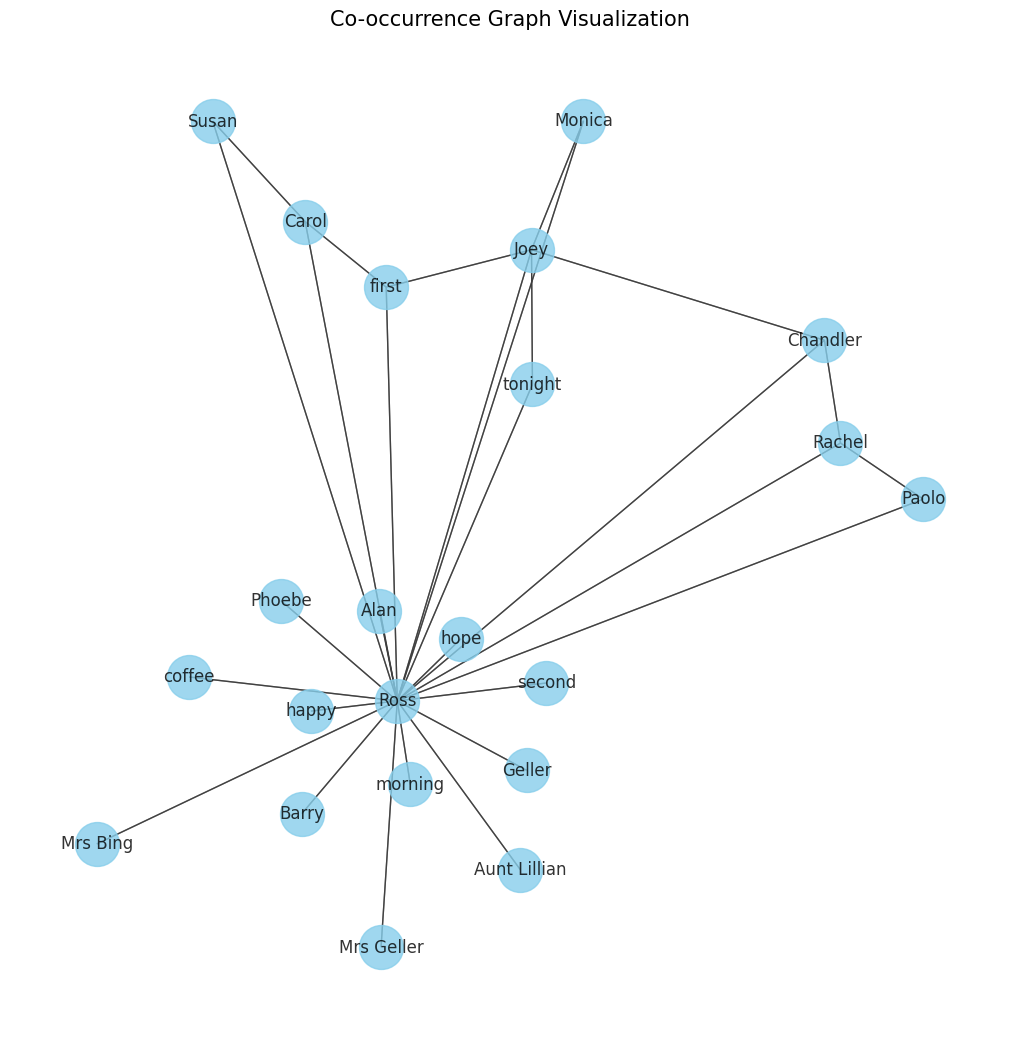

In [48]:
cooc_df_small = cooc_df[cooc_df.freq > 2]

graph = nx.from_pandas_edgelist(
           cooc_df_small[['ent1', 'ent2', 'articles', 'freq']] \
           .rename(columns={'freq': 'weight'}),
           source='ent1', target='ent2', edge_attr=True)

pos = nx.kamada_kawai_layout(graph, weight='weight')

_ = plt.figure(figsize=(10, 10))
nx.draw(graph, pos,
        node_size=1000,
        node_color='skyblue',
        alpha=0.8,
        with_labels = True)
plt.title('Graph Visualization', size=15)

for (node1,node2,data) in graph.edges(data=True):
    width = data['weight']
    _ = nx.draw_networkx_edges(graph, pos,
                           edgelist=[(node1, node2)],
                           width=1.0,  # Adjust this value to change line width
                           edge_color='#505050',
                           alpha=0.5)
# Add title and adjust plot aesthetics
plt.title('Co-occurrence Graph Visualization', size=15)
plt.axis('off')  # Turn off axis
plt.show()

In [49]:
matcher = Matcher(nlp.vocab)
win_synonyms = ['win', 'wins', 'won', 'winning']
pattern = [{'_': {'ref_t': 'PERSON'}}, # subject
           {'_': {'ref_t': {'NOT_IN': ['ORG']}}, 'OP': '*'},
           {'POS': 'VERB', 'LEMMA': {'IN': win_synonyms}},
           {'_': {'ref_t': {'NOT_IN': ['ORG']}}, 'OP': '*'},
           {'_': {'ref_t': 'GPE'}}] # object
matcher.add('wins', [pattern])

support_synonyms = ['support', 'supports', 'supporting', 'supported', 'supporters', 'supporter']
pattern = [{'_': {'ref_t': 'PERSON'}}, # subject
           {'_': {'ref_t': {'NOT_IN': ['ORG']}}, 'OP': '*'},
           {'LOWER': {'IN': support_synonyms}}, {'TEXT': 'of'},
          {'_': {'ref_t': {'NOT_IN': ['ORG']}}, 'OP': '*'},
           {'_': {'ref_t': 'NORP'}}] # object
# pattern2 = [{'_': {'ref_t': 'PERSON'}, {'TEXT': 'of'},
#             {'_': {'ref_t': 'PARTY'}},
#             {'_': {'ref_t': {'NOT_IN': ['PERSON']}}, 'OP': '*'},
#             {'_': {'ref_t': 'PARTY'}]
matcher.add('support', [pattern])

def extract_rel_match(doc, matcher):
    for sent in doc.sents:
        for match_id, start, end in matcher(sent):
            span = sent[start:end]  # matched span
            pred = nlp.vocab.strings[match_id] # rule name
            subj, obj = span[0], span[-1]
            if pred.startswith('rev-'): # reversed relation
                subj, obj = obj, subj
                pred = pred[4:]
            yield ((subj._.ref_n, subj._.ref_t), pred,
                   (obj._.ref_n, obj._.ref_t))

pattern = [{'_': {'ref_t': 'PARTY'}}, # subject
           {'LOWER': {'IN': support_synonyms}}, # predicate
           {'_': {'ref_t': 'PERSON'}}] # object
matcher.add('rev-support', [pattern])
win_sentences = df_sentences[df_sentences['Sentence'].str.contains('win')|df_sentences['Sentence'].str.contains('won')]
win_sentences.reset_index(inplace=True, drop=True)
doc = nlp(win_sentences.loc[2, 'Sentence'])
displacy.render(doc, style='dep')

## Summary IE

- **Write a summary of the results from your information extraction. What did you learn about your text? What sort of relationships and entities did you find in the text? What might you consider adding?**

#### Based on the information extraction from the text, several insights and patterns have emerged regarding the relationships and entities present:

#### 1. The **extraction revealed various types of entities** such as persons (characters like Ross, Monica),geographical locations (GPE) and temporal references (TIME). In addition to the in built named entities, two new custom entities have been added to the nlp pipeline namely, beverages and emotion.

#### 2. The **analysis highlighted both positive and negative relationships between entities**. For instance, words associated with negative sentiments (like hate, fear) were often found between mentions of individuals, indicating potential conflicts or tensions. Conversely, positive sentiment words (like happy, love) appeared in contexts suggesting supportive or affectionate relationships.

#### 3. The **co-occurrence graph visually represented how frequently different entities appeared together in the text**. It showed clusters of closely connected nodes (mostly 'person' entity), indicating strong associations or thematic links between entities. This could reflect recurring themes or recurring interactions among characters or topics.

#### The process of extracting information from the text revealed a web of relationships and themes, showing how different characters and elements interact and appear together. **To deepen this understanding further, I could expand my analysis by including more types of objects, events, or cultural references that are relevant to the story. Additionally, integrating sentiment analysis would help measure the emotional tones linked with each interaction among characters.** This approach would give us a clearer view of how characters' emotions and relationships shape the storyline, making it easier to interpret and understand the text's overall meaning.